# Feedback

Het ontwerp van de _Loss_ functie hangt rechtstreeks samen met het feit of er in de trainingsdata al dan niet zogenaamde **ground truth values** aanwezig zijn. **Dit zijn waarden die, voor elke geobserveerde set van input features in de training data, onambigu, de gewenste (_target_) model output weergeven**. De **model output heeft betrekking op de specifieke predicties en/of acties die op basis van het model gemaakt zullen worden**.  
In het geval dat er in het optimalisatie-algorithme _ground truth values_ gebruikt kunnen worden, spreken we algemeen over een **_supervised_** algorithme. In het andere geval (dus zonder _ground truth values_) spreken we over een **_unsupervised_** algorithme. Tussenvormen worden **_semi-supervised_** algorithmes genoemd.

### _Supervised learning_
  
:::{note} 🌍 _Airco_
:icon: false
:class: simple
In ons simpel airco voorbeeld, zou ons ideale _getrained_ model, iedere geobserveerd waarde in de trainig data _en_ alle toekomstige observaties 
perfect moeten kunnen voorspellen. De eigenlijke observaties vormen dus de gewenste (_target_) waarden voor de model output. Het gaat hier dus over _supervised_ training.
:::

:::{note} 🌍 _CIFAR-10_
:icon: false
:class: simple
In de context van computer vision, is _supervised_ learning lange tijd de gouden standaard geweest.
Een populaire publieke dataset in die context is de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.
De dataset bestaat uit RGB foto's met een resolutie van 32x32 pixels voor 10 categorieën (of **klassen**): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’.  
De bedoeling is om een ML model te ontwikkelen dat toelaat om, bij een willekeurige nieuwe foto (met resolutie 32x32), te beslissen of het om één van de gegeven _classes_ gaat. 
De specifieke manier van modelleren zal aan bod komen in het Computer Vision hoofdstuk. Hier gaan we er enkel van uit dat er een model output $f(\pmb{x})$ zal zijn
die bij iedere nieuwe input het label ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’ of _‘unknown’_ zal toekennen.  
  
Wanneer we hier op zoek gaan naar de ideale parameter waarden van het model, hebben we in de training data voor iedere observatie van 3x32x32 waarden ook het de _gewenste_ model output $y_i$ ter beschikking. We kunnen in dat geval rechtstreeks een _Loss_ functie definiëren die daarmee rekening houdt zoals de _SSE loss_:
$$
J_{SSE}(f(\pmb{x}); \pmb{y}) = \sum_{i=1}^M(y_i-f(x_i))^2
$$
waarbij $y_i$ de numerieke feature voor de **ground truth** labels ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’ of ‘unknown’ voorstelt en $f(x_i)$ de eigenlijke model ouput.
:::

100%|██████████| 170M/170M [01:08<00:00, 2.50MB/s] 


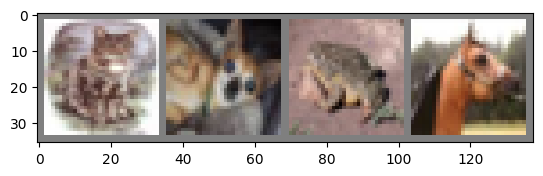

cat   dog   frog  horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")


def imshow(img):
    """
    Display an image tensor after unnormalizing it.

    Args:
        img (torch.Tensor): Image tensor to display.
    """
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

### _Unsupervised learning_

Bij _unsupervised learning_ is het niet mogelijk om parameterwaarden te bepalen aan de hand van een _Loss_ functie die de ouput van het model rechstreeks vergelijkt met de gewenste output (_targets_). Er wordt dan alternatief gewerkt met een _Loss_ functie waarin _onrechtstreekse targets_ verwerkt zitten. Die _Loss_ functie wordt in sommige gevallen ook niet per se rechtstreeks gebuikt in de zoektocht naar optimale parameterwaarden - zoals bijvoorbeeld in _competitieve leeralgorithmes_ zoals _Kohonen's Self-Organizing Map (SOM)_. 

:::{note} 🌍 RGB Clustering
:icon: false
:class: simple

Hier demonstreren we het principe van __unsupervised learning__ met behulp van een _Kohonen Self-Organizing Map (SOM)_. We zullen zien dat we aan de hand van een _competitief leeralgorithme_ een model kunnen trainen dat kleuren kan indelen in "families" zonder enige voorafgaande kennis. Om de optimaliteit van de oplossing tijdens het trainen te evalueren zullen we gebruik maken van een specifieke _Loss_ functie: de _quantization error_.

1. Data Generatie

We creëren een dataset met willekeurige RGB-kleurvectoren. Elke kleur is een vector met drie waarden (Rood, Groen, Blauw), die elk variëren van 0 tot 1.
:::

In [30]:
from minisom import MiniSom

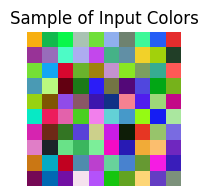

In [31]:
# Generate the input data: 1000 random RGB colors
# Each color is a vector of 3 floats (R, G, B) between 0 and 1.
n_colors = 10000
rng = np.random.default_rng()
input_data = rng.random((n_colors, 3))

# Display the first 100 random colors to see our input
plt.figure(figsize=(8, 2))
plt.imshow(input_data[:100].reshape(10, 10, 3), interpolation="nearest")
plt.title("Sample of Input Colors")
plt.axis("off")
plt.show()

:::{note} 🌍 RGB Clustering
:icon: false
:class: simple

2. Het Kohonen Netwerk (SOM) en de _Loss_ Functie

Een Kohonen-netwerk is een _grid_ van artificiële neuronen. Elk neuron heeft een gewichtsvector met dezelfde dimensie als de invoergegevens. In ons geval is de gewichtsvector van elk knooppunt een array met 3 elementen die een RGB-kleur vertegenwoordigt. De gewichtvectoren van alle neuronen vormen de parameters van het model.

Een invoervector wordt vergeleken met alle gewichtsvectoren in het 2D-rooster. Het meest gelijkende neuron (de _Best Matching Unit (BMU)_) en zijn buren worden bijgewerkt.

```
   Invoervector [R, G, B]
         |
         |
         +--------------------+
         | Vergelijking met   |
         | alle gewichten     |
         v                    v
  +-----+-----+-----+-----+
  |  O  |  O  |  N  |  O  |   <-- 2D grid
  +-----+-----+-----+-----+
  |  O  |  N  | BMU |  N  |   O = Neuron
  +-----+-----+-----+-----+   BMU = Best Matching Unit
  |  O  |  O  |  N  |  O  |   N = Buur van de BMU
  +-----+-----+-----+-----+
  |  O  |  O  |  O  |  O  |
  +-----+-----+-----+-----+
```

Het trainingsproces werkt als volgt:
- Initialisatie: Gewichtsvectoren worden geïnitialiseerd met willekeurige kleuren.
- Competitie: Voor elke invoerkleur uit onze dataset zoekt het netwerk het neuron waarvan de gewichtsvector het meest vergelijkbaar is. Dit "winnende" neuron wordt de _Best Matching Unit (BMU)_ genoemd. De gelijkenis wordt doorgaans gemeten met de Euclidische afstand.
- Adaptatie: De gewichtsvector van de BMU wordt bijgewerkt om nog meer op de invoerkleur te lijken. De buren op het _grid_ worden ook bijgewerkt, maar in mindere mate. Dit is het "zelforganiserende" deel, omdat het aangrenzende neuronen aanmoedigt om vergelijkbare kleuren te representeren.

De _Loss_ functie die hier wordt gebruikt us _quantization error (QE)_ De QE is de gemiddelde afstand tussen elke invoervector en de gewichtsvector van zijn BMU. Het kwantificeert hoe getrouw de _map_ de invoergegevens representeert.

De formule is:
$$
QE=\frac{1}{N}\sum_{i=1}^N||\pmb{x_i}​−\pmb{w_{c(i)}}​||
$$
Waarbij:
- $N$ het totale aantal invoervectoren is.
- $\pmb{x_i}$ de i-de invoerkleurvector is.
- $\pmb{w_{c(i)}}$ de gewichtsvector van de BMU voor de invoer $\pmb{x_i}$ is.
- $∣|...|| de Euclidische afstand aangeeft.

Een dalende QE toont aan dat de neuronen van de _map_ steeds dichter bij de invoergegevens komen die ze representeren, wat betekent dat het netwerk een betere representatie aanleert.

3. Implementatie en Training
:::

In [38]:
# --- SOM Initialization ---
map_size = (30, 30)
# The SOM will have 3 features (R, G, B)
som = MiniSom(
    x=map_size[0],
    y=map_size[1],
    input_len=3,
    sigma=1.5,
    learning_rate=0.5,
    neighborhood_function="gaussian",
    random_seed=42,
)

# Initialize the weights randomly
som.random_weights_init(input_data)

# --- Training the SOM ---
num_iterations = 1000
som.train(input_data, num_iterations, verbose=True)

num_iterations = 50000
som.train(input_data, num_iterations, verbose=True)

print("\nTraining complete.")

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.0773508275191557
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.04900265055342206

Training complete.


:::{note} 🌍 RGB Clustering
:icon: false
:class: simple

3. Visualisatie getrained netwerk
:::

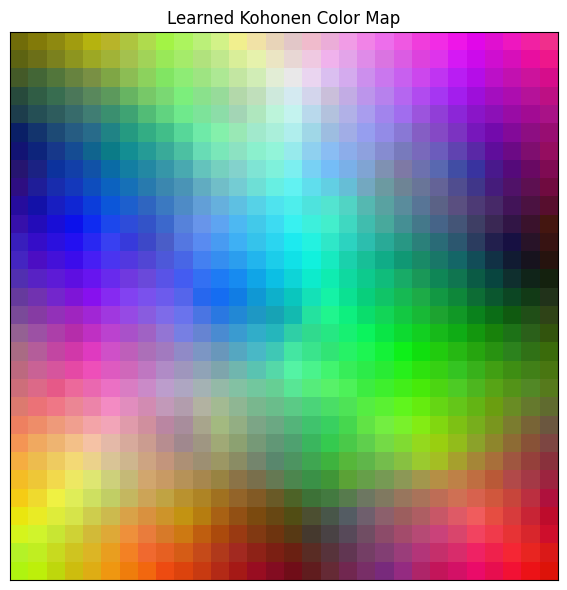

In [39]:
# Get the final weights of the SOM
# These weights are the learned color representations for each node
learned_map = som.get_weights()

# --- Plotting the results ---
fig = plt.figure(figsize=(12, 6))

# Plot the learned color map
ax = fig.add_subplot()
ax.imshow(learned_map, interpolation="nearest")
ax.set_title("Learned Kohonen Color Map")
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

#### Reward function

Een speciale variant van de _Loss_ functie 



bv. Reinforcement learning




